In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
#hämta data
data = pd.read_csv('WineQT.csv')

In [3]:
data.head()
#att få en bättre bild av vad som finns i datasetet

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
#att se hur många data finns i datasetet
print(len(data))
data.shape

1143


(1143, 13)

# datasetet har 1143 datapunkter och 13 attribute

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Man ser att quality har mean = 5.65 som visar att majoriteten av viner ligger på 5.65 poäng. Vi har vin/viner som har bästa kvalite (8) och viner som har sämsa kvalite i det här datasetet. pH som är också en annan viktig värde ligger runt 3-3.5 som är en bra pH. Mindre än 3 eller högre än 4 är inte en bra vin!
free sulfur dioxide och total sulfur dioxide har betydligt större skillnad mellan minsta värde och största värde darför mean värde har större skillnad med min och max än de andra attibute. man kan se den synligare när jag ritar histogram

In [14]:
num_classes = len(data['quality'].unique())
print(f"Antal klasser av kvalitet är {num_classes}")

Antal klasser av kvalitet är 6


Här kan man se hur quality är distributed. det börjar med 3 som är sämsta kvalite och slutar med 8 som är bästa kvalitet i det här dataset =>>>
quality = [3,4,5,6,7,8]
6 element i quality list

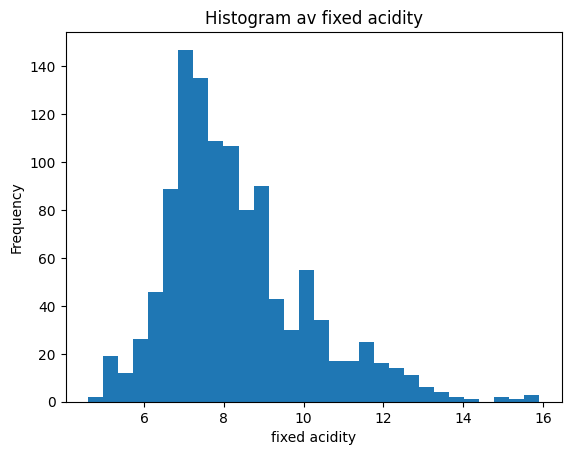

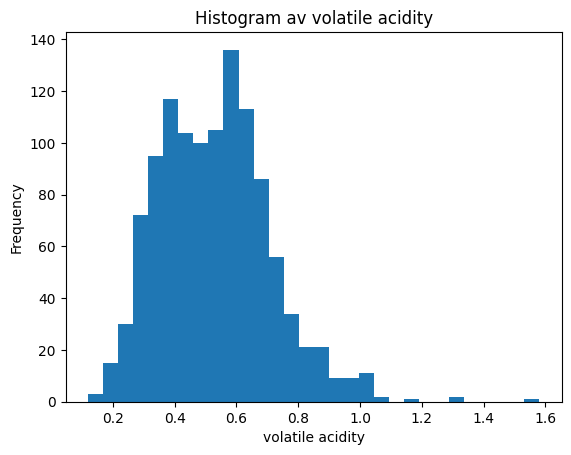

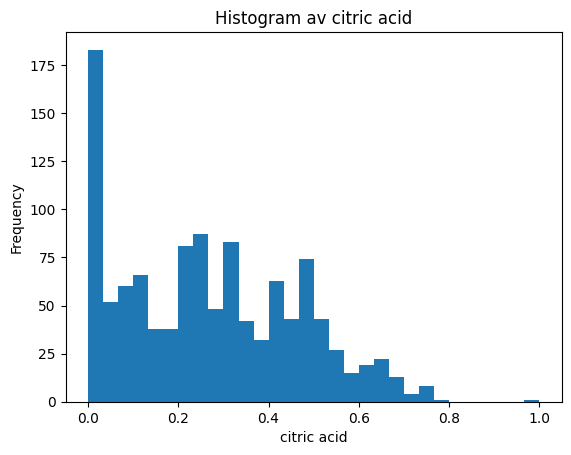

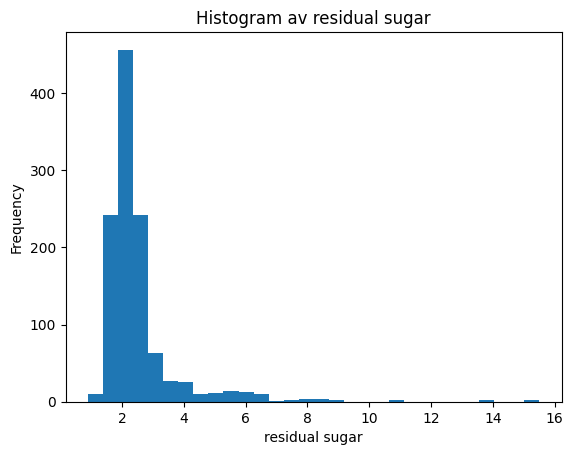

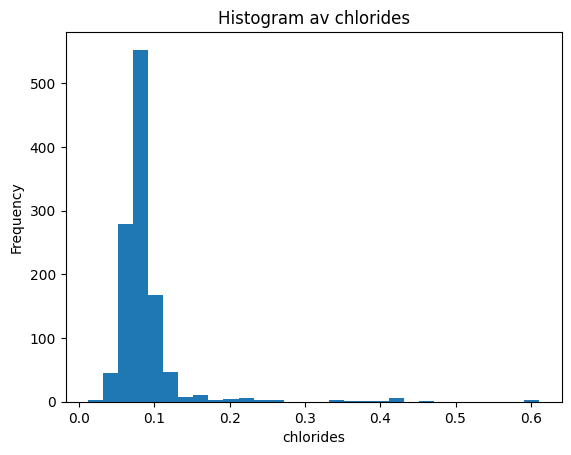

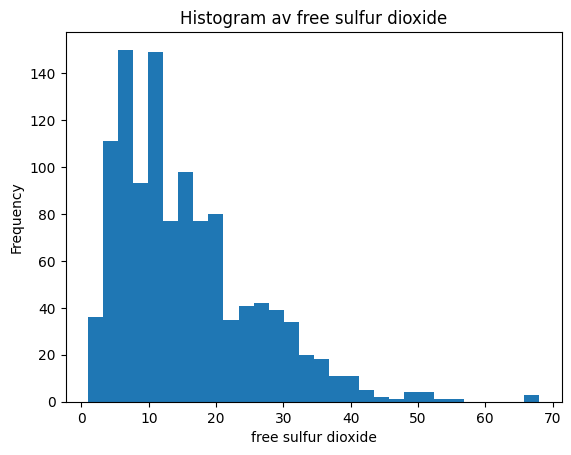

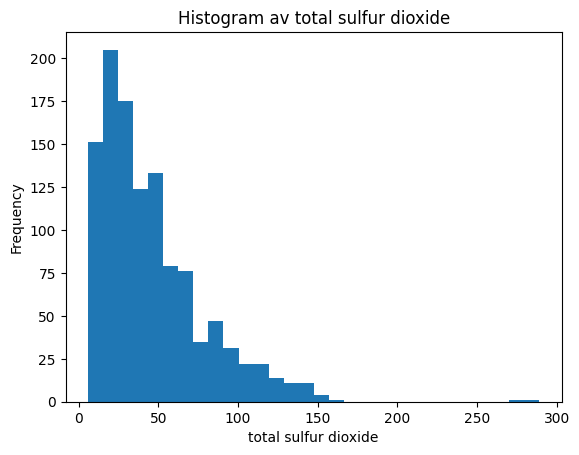

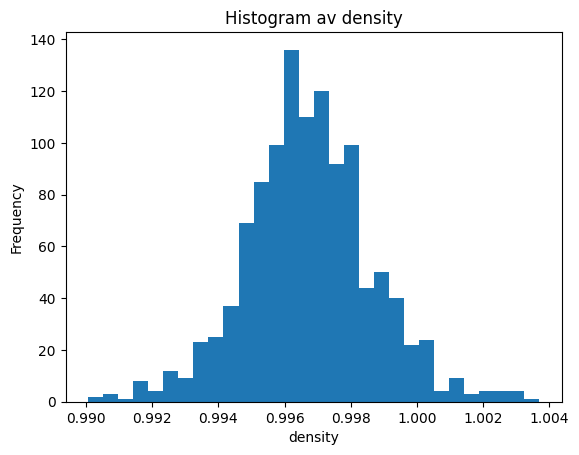

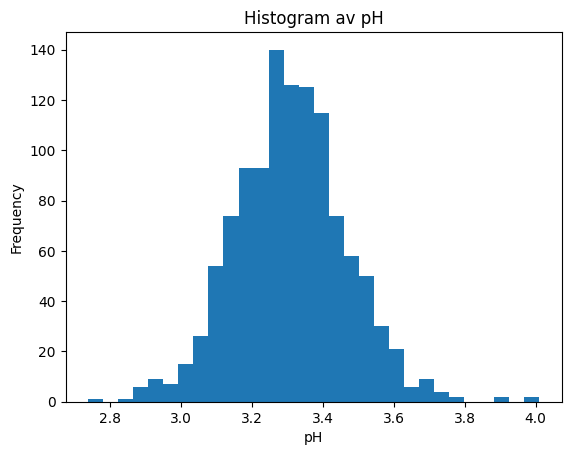

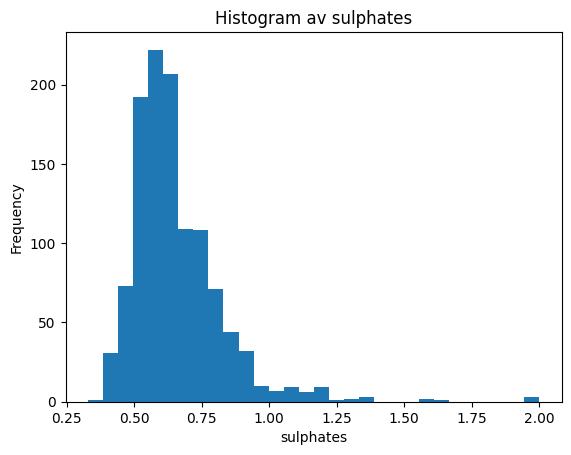

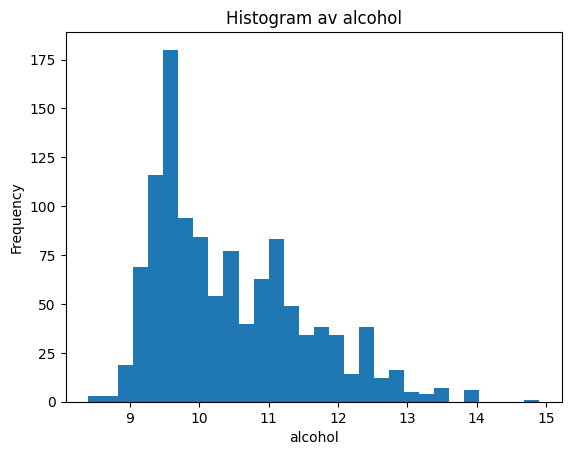

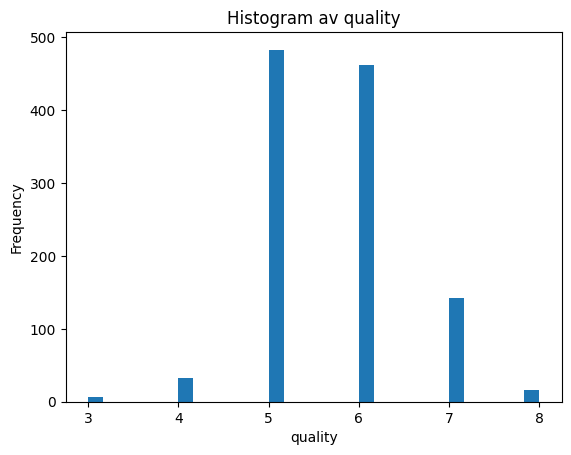

In [25]:
for column in data.columns.drop("Id"):
    #id behöver inte visas. det är orelevant tycker jag
    plt.hist(data[column], bins=30) 
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram av ' + column)
    plt.show()

Som sagt man ser på quality histogram att kvalitet är uppdelat från 3 till 9 men väldigt få har 3,4 och 8. Majoriteten är 5, 6 och lite 7. Så man kan säga att det är en medelklass vin dataset som vi ska jobba med.

Eftersom vi ska kolla på kvalitet på vinerna vi ska ha en beroende attribute som är kvalitet Quality och andra som alla oberoende.
jag väljer först att dela min data till 80 procent train och 20 procent test. Sen ska jag kolla på resultatet och se hur det går. Sen kan man helt enkelt ändra ratio till dem och välja den bästa

In [7]:
X = data.drop('quality', axis=1)  # Alla kolumner FÖRUTOM 'Quality' för quality är det jag ska jämföra allt med
y = data['quality'] #jag lägger Quality på y axis 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#sen ska träna datasetet
träna = DecisionTreeClassifier(random_state=42)
träna.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
#dags att utvärdera och se vilken score fick jag
y_pred = träna.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Modellen har en accuracy av {accuracy:.2f}")

Modellen har en accuracy av 0.56


Med min model och 80% train och 20% test fick jag score = 0.5633187772925764

Nu ska jag byta train och test ratio och se vad som händer

In [10]:
X = data.drop('quality', axis=1)  # Alla kolumner FÖRUTOM 'Quality' för quality är det jag ska jämföra allt med
y = data['quality'] #jag lägger Quality på y axis 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#sen ska träna datasetet
träna = DecisionTreeClassifier(random_state=42)
träna.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
y_pred = träna.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Modellen har en accuracy av {accuracy:.2f}")

Modellen har en accuracy av 0.57


Nu fick jag 0.5652173913043478 som är ganska nära förra resultat av test score.

Trots att jag valde använda 90% av datasetet för att ha en bättre tränade model att kunna använda vid senare tillfällen, såg jag inte en jätte stor skillnad. Detta kan bero på kvalitet på data eller brusiga data som vi har. Decision tree är känslig för överanpassning när det är stora datamängder och kan därför inte generalisera bra data

# Djupet på trädet

In [12]:
tree_depth = träna.get_depth()
print("Djupet på trädet:", tree_depth)

num_leaves = träna.get_n_leaves()
print("Antal löv i trädet:", num_leaves)


Djupet på trädet: 15
Antal löv i trädet: 257


In [34]:
# Hämta betydelsen av varje attribut
feature_importance = träna.feature_importances_

# Skapa en DataFrame för att visa betydelsen av varje attribut
importance_df = pd.DataFrame({'Attribute': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Skriv ut de viktigaste attributen
print("De attribut med störst påverkan:")
print(importance_df)


De attribut med störst påverkan:
               Attribute  Importance
10               alcohol    0.140205
9              sulphates    0.132843
11                    Id    0.095068
6   total sulfur dioxide    0.091772
1       volatile acidity    0.083089
3         residual sugar    0.076306
0          fixed acidity    0.076137
4              chlorides    0.071550
8                     pH    0.068381
2            citric acid    0.063034
7                density    0.061712
5    free sulfur dioxide    0.039901
